In [54]:
# imports
import pandas as pd
import re
import unicodedata
import nltk
import json
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# read data
path = '../data/database/.temp/all.csv'
df = pd.read_csv(path, sep=';')

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [91]:
df_selection = df[df['kind']=='Article']
words = basic_clean(''.join(str(df_selection['description'].tolist())))

In [92]:
words[0:20]

['labtwin',
 'world',
 'first',
 'voice',
 'aipowered',
 'digital',
 'lab',
 'assistant',
 'working',
 'alongside',
 'scientist',
 'point',
 'experimentation',
 'access',
 'data',
 'look',
 'information',
 'coordinate',
 'experiment',
 'take']

{
   "image": 57,
   "fashion": 51,
   "model": 47,
   "data": 45,
   "learning": 44,
   "customer": 37,
   "method": 35,
   "approach": 33,
   "machine": 31,
   "article": 26
}


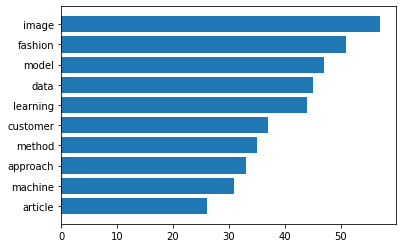

In [93]:
onegrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]
onegrams = onegrams.to_dict()
onegrams = {' '.join(x): y for x,y in onegrams.items()}
print(json.dumps(onegrams, indent=3))

D = onegrams
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()

{
   "machine learning": 30,
   "size fit": 10,
   "neural network": 8,
   "fashion item": 8,
   "learning algorithm": 8,
   "fashion dna": 8,
   "generative adversarial": 7,
   "texture synthesis": 7,
   "state art": 6,
   "annotation projection": 6
}


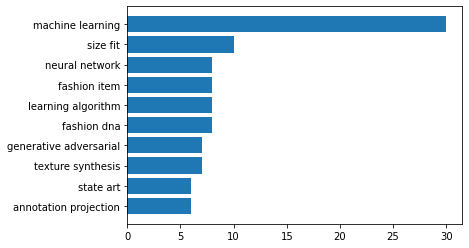

In [94]:
twograms = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
twograms = twograms.to_dict()
twograms = {' '.join(x): y for x,y in twograms.items()}
print(json.dumps(twograms, indent=3))

D = twograms
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()

{
   "machine learning algorithm": 8,
   "generative adversarial network": 6,
   "us machine learning": 5,
   "size fit recommendation": 4,
   "machine learning model": 4,
   "personalized size fit": 3,
   "source language sl": 3,
   "neural network architecture": 3,
   "convolutional neural network": 3,
   "machine learning technique": 3
}


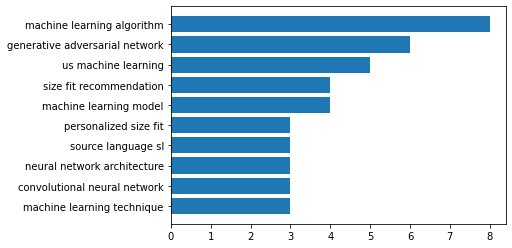

In [95]:
threegrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
threegrams = threegrams.to_dict()
threegrams = {' '.join(x): y for x,y in threegrams.items()}
print(json.dumps(threegrams, indent=3))

D = threegrams
plt.barh(*zip(*D.items()))
plt.gca().invert_yaxis()
plt.show()

plt.show()